In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
a=pd.read_csv("Classified Data",index_col=0)
a.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
#standardize variables
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [ ]:
ss.fit(a.drop('TARGET CLASS',axis=1))

StandardScaler()

In [ ]:
sf= ss.transform(a.drop('TARGET CLASS',axis=1))

In [ ]:
a_feat = pd.DataFrame(sf,columns=a.columns[:-1])
a_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
#train and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sf,a['TARGET CLASS'],test_size=0.35)

In [ ]:
#using knn
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred=KNN.predict(x_test)

In [ ]:
#prediction and evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[154  16]
 [ 13 167]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       170
           1       0.91      0.93      0.92       180

    accuracy                           0.92       350
   macro avg       0.92      0.92      0.92       350
weighted avg       0.92      0.92      0.92       350



In [ ]:
#choosing k value
error_rate = []

# Will take some time
for i in range(1,40):
    
    KNN= KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    pred_=KNN.predict(x_test)
    error_rate.append(np.mean(pred_ != y_test))

Text(0, 0.5, 'Error Rate')

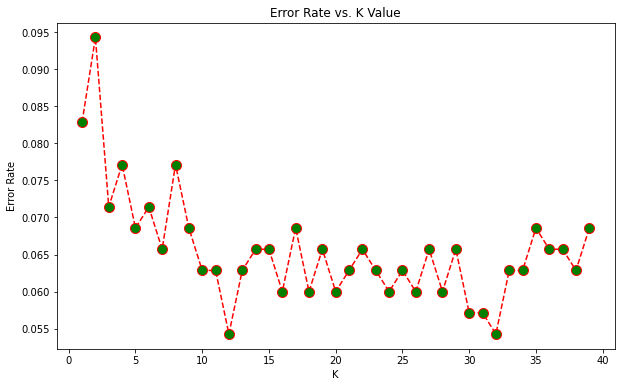

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
KNN= KNeighborsClassifier(n_neighbors=1)

KNN.fit(x_train,y_train)
pred =KNN.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[154  16]
 [ 13 167]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.91       170
           1       0.91      0.93      0.92       180

    accuracy                           0.92       350
   macro avg       0.92      0.92      0.92       350
weighted avg       0.92      0.92      0.92       350



In [ ]:
# NOW WITH K=23
KNN= KNeighborsClassifier(n_neighbors=23)

KNN.fit(x_train,y_train)
pred =KNN.predict(x_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[157  13]
 [  9 171]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       170
           1       0.93      0.95      0.94       180

    accuracy                           0.94       350
   macro avg       0.94      0.94      0.94       350
weighted avg       0.94      0.94      0.94       350

